# Count Circles

## Description

Count the number of circles in the following image


## Group 6

Catarina Costa, pg52676 \
Fernando Alves, pg54470 \
Marta Aguiar, pg52694  

In [1]:
import cv2
# to install cv2 use: pip install opencv-python
import matplotlib.pyplot as plt
import numpy as np
import math

# Smoothing

Primeiramente começamos por suavizar a imagem usando técnicas de _High ass Filter_, uma vez que esta apresentava muito ruido. O primeiro filtro que aplicamos foi o _**medianBlur**_, pois este é bastante bom para remover ruido "_salt-and-pepper_". Em seguida aplicamos o _**GaussianBlur**_ para eliminar o restante ruido gaussiano, que é mais suave e difuso.

Aplicamos também o filtro _**fastNlMeansDenoising**_ intrecalado com ajustes no contraste da imagem, através da função _**equalizeHist**_, uma vez que este algoritmo funcionada bastante bem para imagens a preto e branco. A aplicação do filtro _**fastNlMeansDenoising**_ foi feita três vezes, com valores de intensidade da aplicação do filtro diferentes, de modo a obtermos uma imagem suficiente para a deteção dos círculos ser possível.

In [2]:
fname = 'Circles-noisy.png'
img_original = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
img = img_original.copy()

### medianBlur

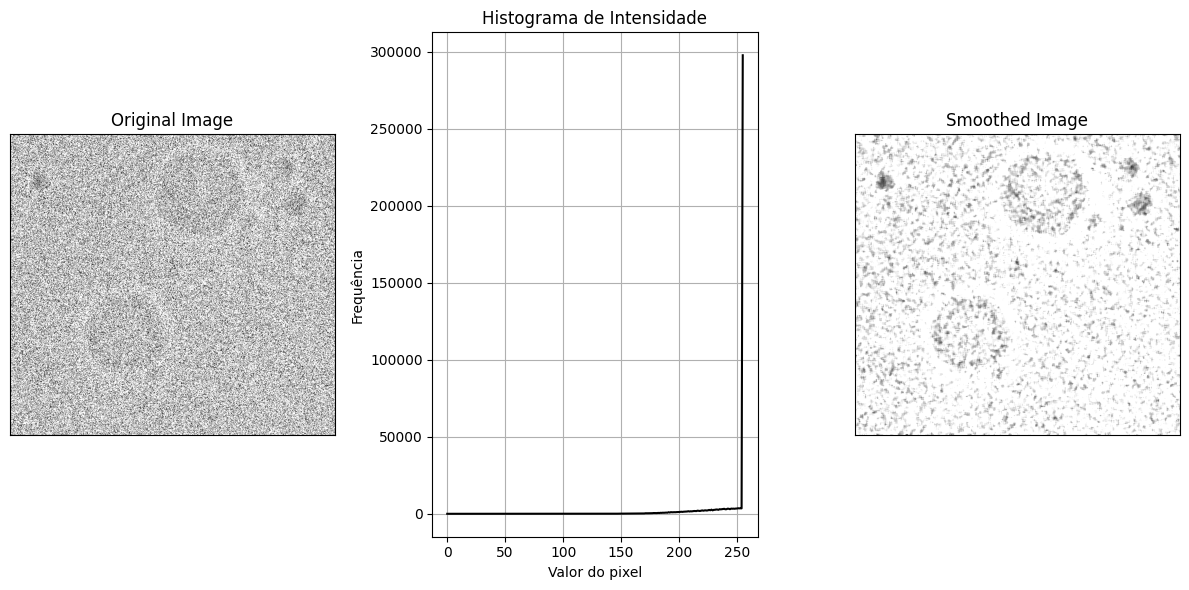

In [3]:
m = 7
img = cv2.medianBlur(img,m,0)

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### GaussianBlur

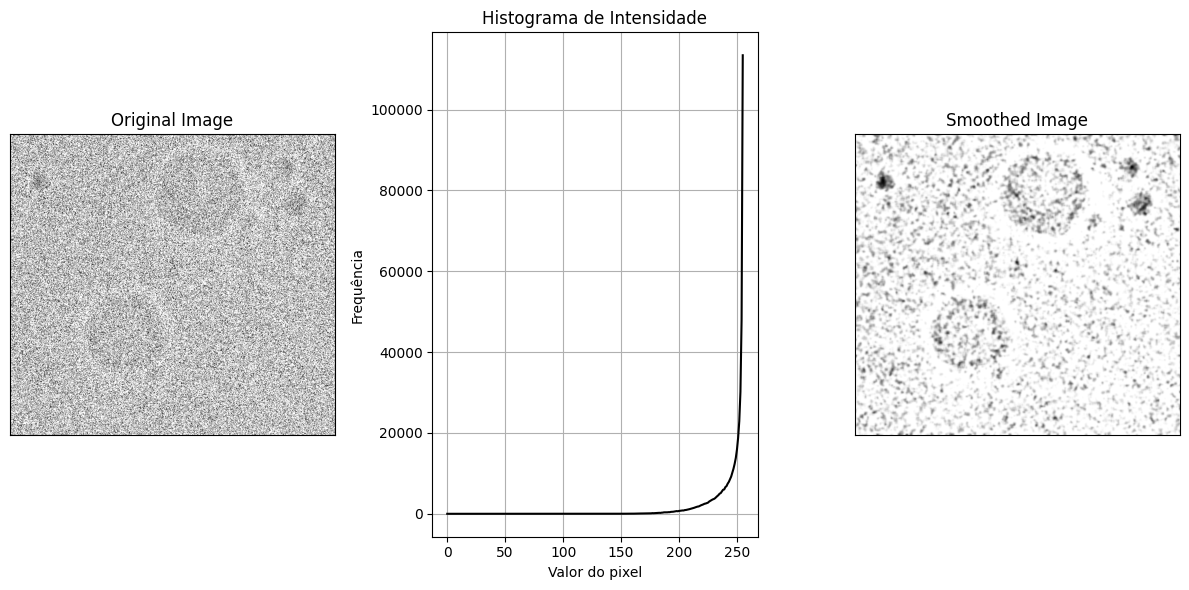

In [4]:
m = 7
img = cv2.GaussianBlur(img,(m,m),0)

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### fastNlMeansDenoising

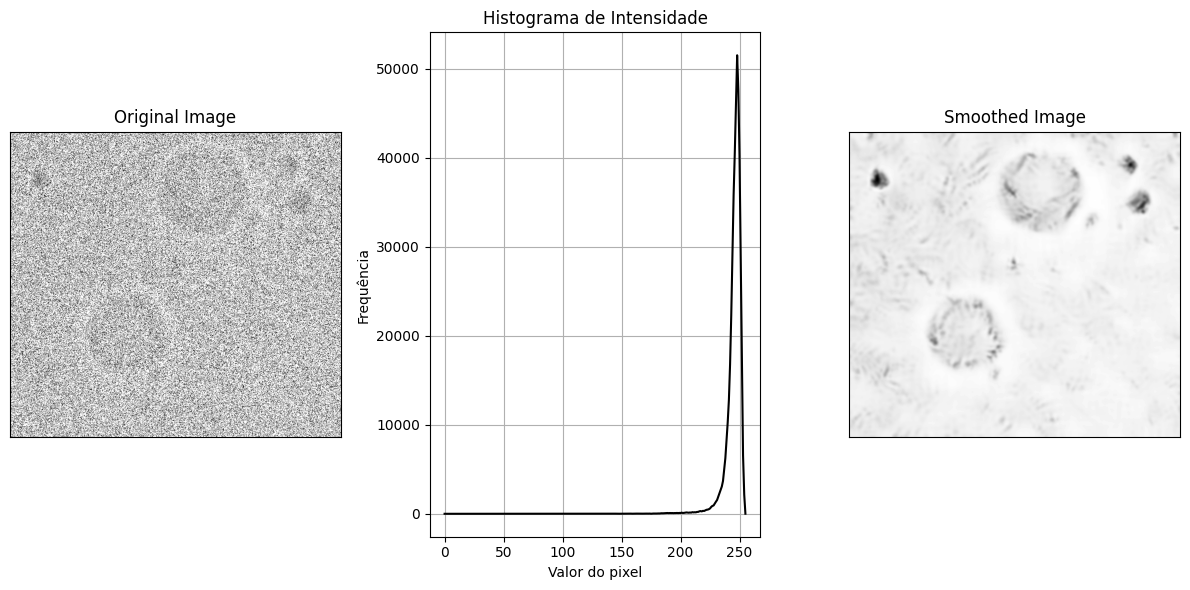

In [5]:
img = cv2.fastNlMeansDenoising(img,None,15,27,45)

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

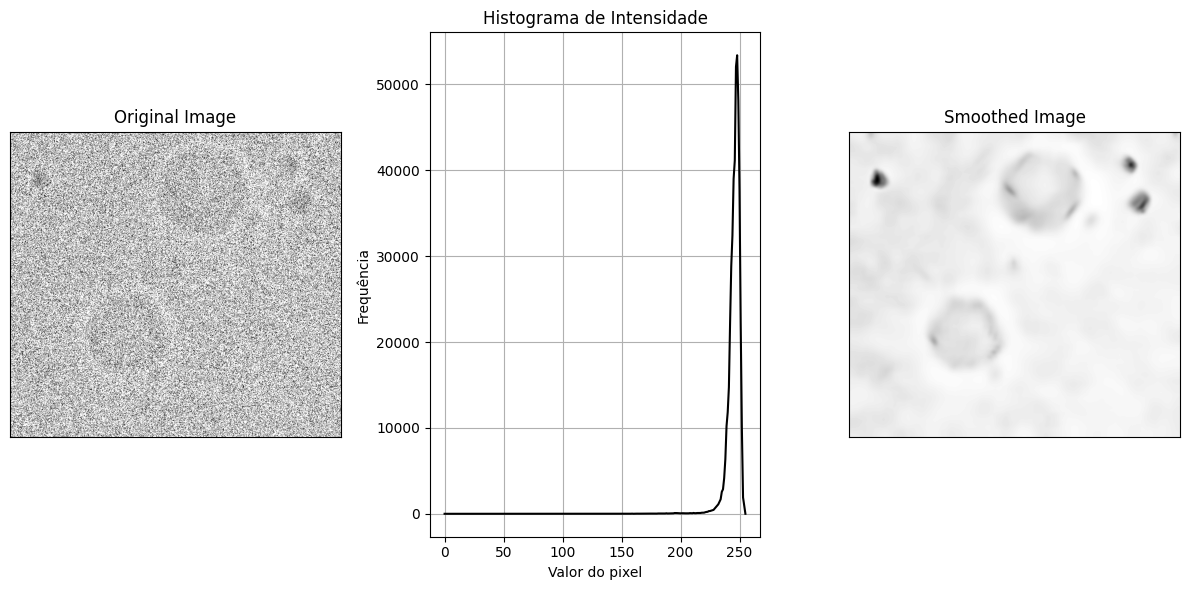

In [6]:
img = cv2.fastNlMeansDenoising(img,None,15,27,30)

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### equalizeHist

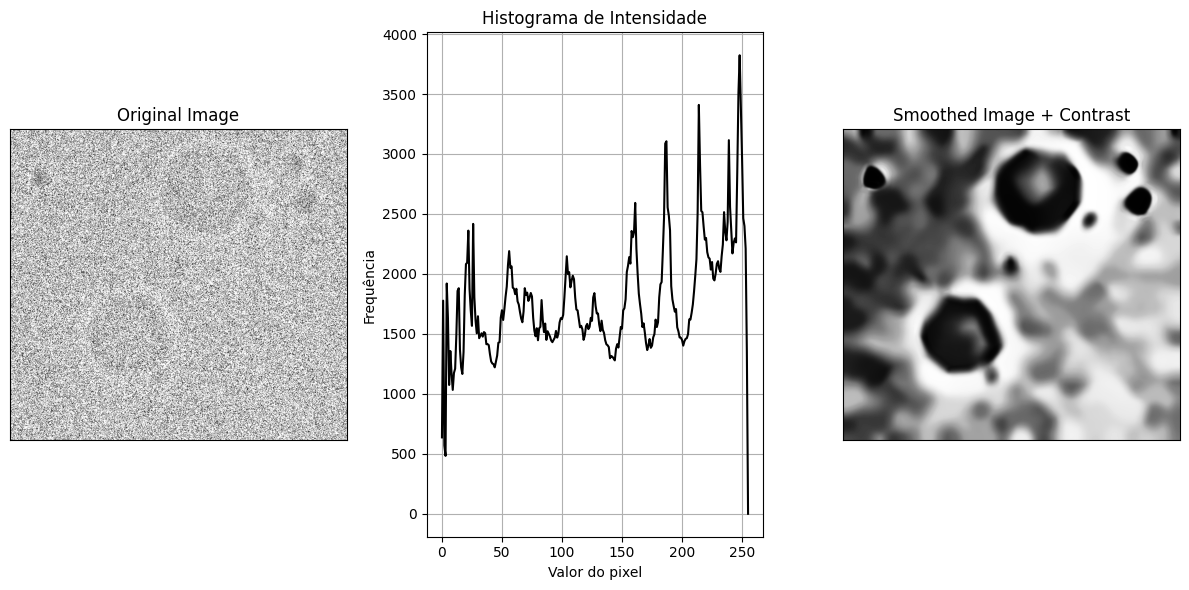

In [7]:
img_contrast = cv2.equalizeHist(img)
img = cv2.fastNlMeansDenoising(img_contrast,None,15,27,70)

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image + Contrast')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

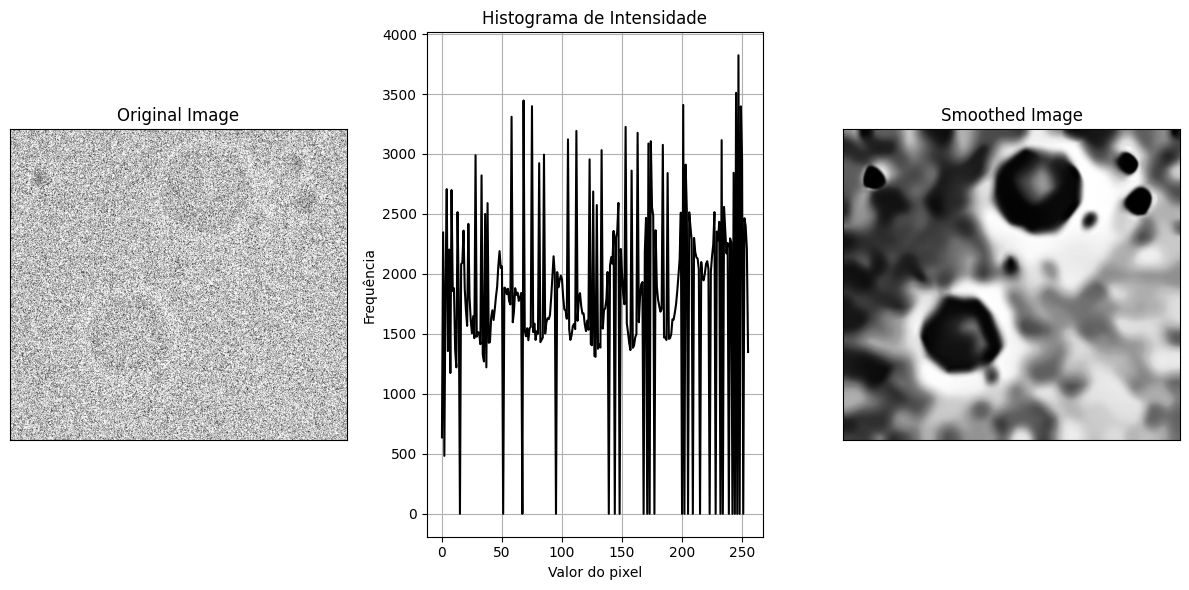

In [8]:
img_contrast = cv2.equalizeHist(img)
img = img_contrast.copy()

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Binarizing

Submetemos a imagem proveniente da suavização a técnicas de _Low Pass Filter_ como a aplicação dos _**Sobel Gradient Operators**_. De modo a destacar áreas de interesse na imagem, aplicamos um método de _**thresholding**_, o _**threshold**_. Esta aplicação binariza os valores dos pixeis da imagem através do uso de um valor limiar (251.5), de forma a segmentá-la e obter uma imagem binária, com apenas dois valores de pixels, eliminando a possível gama de cinzentos que a imagem possa ter.

Por uma última vez, foi aplicado mais uma técnica de contraste à imagem para intensificar os detalhes da imagem para facilitar a posterior binarização.

In [9]:
# correlate
def correlate (kernel, image):
    W = image.shape[0]
    H = image.shape[1]
    out =np.zeros((W,H))
    a = kernel.shape[0]%2
    b = kernel.shape[1]%2
    #print (a,b)
    for y in range(b,H-b): 
        for x in range(a,W-a): 
            for s in range (-a,a+1):
                for t in range (-b, b+1):
                    out[x,y] += (kernel[s,t]*image[x+s,y+t])
    return out


# rescale
def rescale (image):
    image = np.absolute(image)
    mymin=np.amin(image)
    mymax=np.amax(image)
    W = image.shape[0]
    H = image.shape[1]
    for y in range(H): 
        for x in range(W): 
            image[x,y] = (image[x,y]-mymin)*256/(mymax-mymin)
    return image

In [10]:
# Sobel Gradient Operators
Sobel_y = np.array([[-1,0,1], 
                    [-2, 0, 2],
                    [-1,0,1]], dtype=float)

Sobel_x = np.array([[-2,-4,-2],
                    [0, 0, 0],
                    [2,4,2]], dtype=float)

gx = correlate(Sobel_x, img)
gx = np.absolute(gx)
gy = correlate(Sobel_y, img)
gy = np.absolute(gy)

grad = np.sqrt(np.square(gx) + np.square(gy))

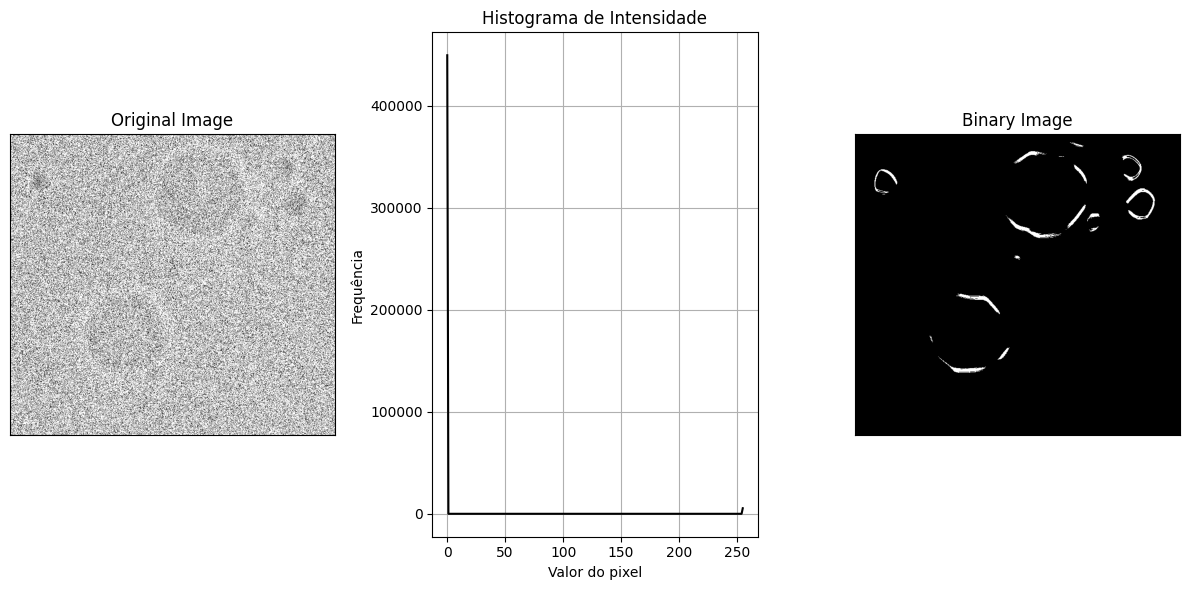

In [11]:
img = np.uint8(grad)
img_contrast = cv2.equalizeHist(img)
img = img_contrast.copy()

ret, img = cv2.threshold(img, 251.5, 255, cv2.THRESH_BINARY)
img_binary = img.copy()

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Binary Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Canny Algorithm

Recorremos ao algoritmo _**Canny**_ para detetar os contornos dos círculos na imagem. Optamos por esse algoritmo porque minimiza o reconhecimento de falsos contornos e garante uma boa localização dos contornos reais.

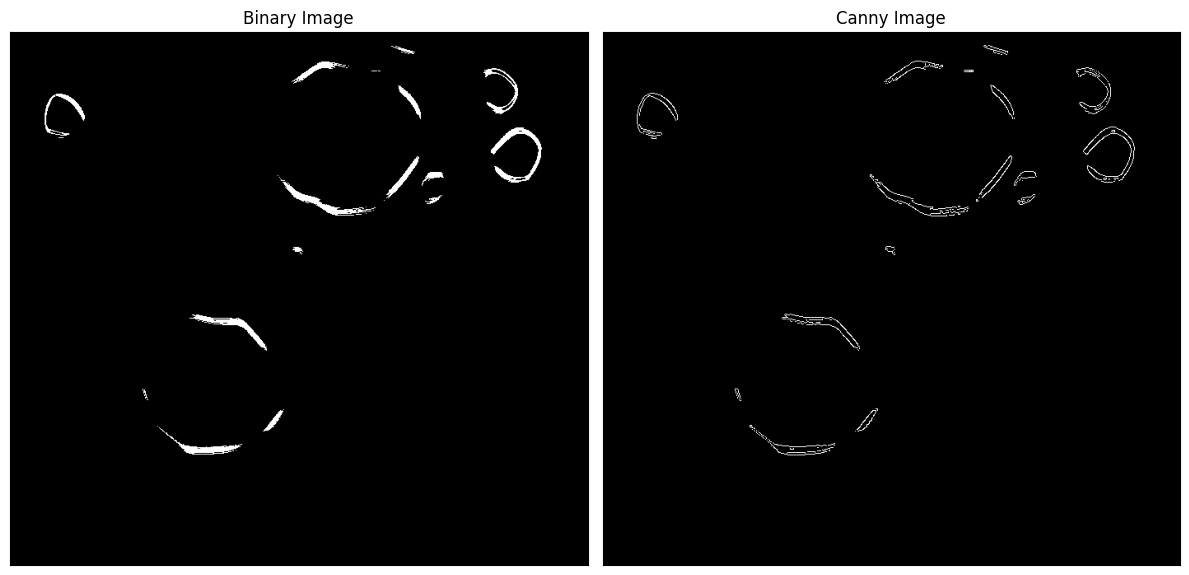

In [12]:
edges = cv2.Canny(img,200,200)
img = edges.copy()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Binary Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('Canny Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Hough Transform

Para atingir o objetivo deste trabalho, utilizamos um método de _Hough Transform_, o _**HoughCircles**_, responsável pela detação de círculos em imagens de tons de cinza.

A aplicação este método foi através da imagem _Canny_ anteriormente desenvolvida, para tornar mais fácil a deteção dos contornos dos círculos.

Abaixo apresentam-se os resultados obtidos.

Circles detected: 5


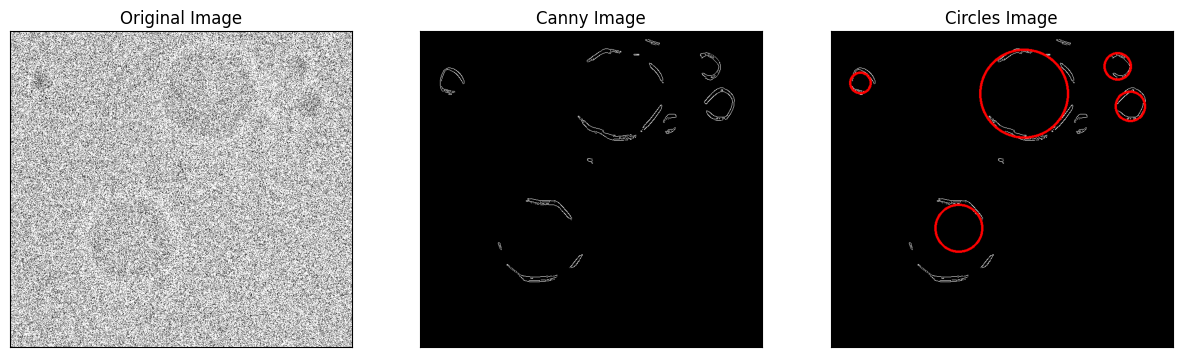

In [13]:
num_circles = 0
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=75, param2=25,
                               minRadius=1, maxRadius=150)

img_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        num_circles += 1
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_circles, center, radius, (255, 0, 0), 3)

print('Circles detected: ' + str(num_circles))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Canny Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(img_circles, cmap='gray')
plt.title('Circles Image')
plt.xticks([]), plt.yticks([])
plt.show()

Com este tratamento, conseguimos identificar **5** círculos com o algoritmo.

--------------------------------

# Conclusão

Para atingir o objetivo de detectar círculos numa imagem ruidosa, usamos técnicas como _**medianBlur**_ e _**GaussianBlur**_ para suavizar a imagem e _**equalizeHist**_ para destacar os contornos dos círculos. Depois de realçar os contornos com o algoritmo _**Canny**_, aplicamos o método _**HoughCircles**_ para a deteção dos mesmos. 

Embora tenhamos tido successo na identificação dos círculos, um deles não foi detectado completamente, mostrando que precisamos de melhorar os nossos métodos.